In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
#Da acesso ao drive para acessar os arquivos direto dele

from google.colab import drive
drive.mount('/content/drive')

In [118]:
#Define o caminho para o dataset
DATA_PATH = r"dadosIntegradosAltitude-Clima-Solo-Agrotoxicos-Era5-comCidades-ComKmeans3.xlsx"

In [119]:
#Carrega o dataset

def load_main_data():
    # return pd.read_excel(io=DATA_PATH, sheet_name="raw_data")
    return pd.read_excel(io=DATA_PATH, sheet_name="Sheet1")
    
main_data = load_main_data()
#main_data

In [120]:
main_data.drop(columns=["Unnamed: 0", 'Unnamed: 0.1'], inplace=True)

In [90]:
main_data.head(50)

,year,location,state,rep,n_spray,brand_name,sev,brand_name_EN,RH_mean_mes_11,RH_sd_mes_11,...,PICO_DOSE_nrmlzd_Standart,TRIF_DOSE_nrmlzd_Standart,PROT_DOSE_nrmlzd_Standart,TEBU_DOSE_nrmlzd_Standart,PYRA_DOSE_nrmlzd_Standart,FLUX_DOSE_nrmlzd_Standart,BENZ_DOSE_nrmlzd_Standart,EPOX_DOSE_nrmlzd_Standart,BIXA_DOSE_nrmlzd_Standart,Cluster
0,2015,CAMPO VERDE,MT,1,3,Alto 100,71.5,0,-0.458631,1.500566,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
1,2015,CAMPO VERDE,MT,2,3,Alto 100,67.2,0,-0.458631,1.500566,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
2,2015,CAMPO VERDE,MT,3,3,Alto 100,66.0,0,-0.458631,1.500566,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,1
3,2015,CAMPO VERDE,MT,4,3,Alto 100,64.0,0,-0.458631,1.500566,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,1
4,2015,CAMPO VERDE,MT,1,3,Alto 100,80.0,0,-0.458631,1.500566,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
5,2015,CAMPO VERDE,MT,2,3,Alto 100,65.0,0,-0.458631,1.500566,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,1
6,2015,CAMPO VERDE,MT,3,3,Alto 100,75.0,0,-0.458631,1.500566,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
7,2015,CAMPO VERDE,MT,4,3,Alto 100,60.0,0,-0.458631,1.500566,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,1
8,2016,CAMPO VERDE,MT,1,3,Alto 100,67.8,0,-0.458458,0.424728,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
9,2016,CAMPO VERDE,MT,2,3,Alto 100,71.5,0,-0.458458,0.424728,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2


In [126]:
main_dataTmp = main_data.copy()

In [127]:
main_dataTmp['sev'] = (main_dataTmp['sev'] / 25).astype(int)

In [53]:
columns_to_keep = ['sev', 'n_spray', 'RH_mean_mes_12', 'RH_sd_mes_12', 'RH_max_mes_12',
       'pr_mean_mes_11', 'pr_mean_mes_12', 'pr_sd_mes_12', 'pr_max_mes_12',
       'pr_sum_mes_12', 'ETo_sd_mes_11', 'ETo_max_mes_11', 'ETo_min_mes_11',
       'ETo_mean_mes_12', 'ETo_max_mes_12', 'ETo_sum_mes_12', 'Rs_max_mes_11',
       'Rs_min_mes_11', 'Rs_mean_mes_11', 'Rs_sd_mes_11', 'Rs_min_mes_12',
       'Rs_mean_mes_12', 'Rs_sd_mes_12', 'u2_mean_mes_11', 'u2_max_mes_11',
       'u2_mean_mes_12', 'u2_sd_mes_12', 'u2_max_mes_12', 'Tmax_sd_mes_11',
       'Tmax_mean_mes_11', 'Tmax_max_mes_11', 'Tmax_min_mes_11',
       'Tmax_sd_mes_12', 'Tmax_mean_mes_12', 'Tmax_max_mes_12',
       'Tmin_sd_mes_11', 'Tmin_min_mes_12', 'Tmin_mean_mes_12',
       'tipo_umidade_EN', 'desc_completa_EN_P1', 'legenda_EN',
       'grande_grupo_EN', 'subgrupos_EN', 'desc_completa_EN_P2',
       'OH_desc_completa_Tropical', 'OH_desc_completa_Temperado', 'OH_AZOX',
       'OH_PICO', 'OH_PROT', 'OH_TEBU', 'OH_PYRA', 'OH_BENZ', 'OH_EPOX',
       'OH_BIXA', 'CHECK', 'MBC', 'QOI', 'long_nrmlzd_Standart',
       'AZOX_DOSE_nrmlzd_Standart', 'PROT_DOSE_nrmlzd_Standart',
       'TEBU_DOSE_nrmlzd_Standart', 'PYRA_DOSE_nrmlzd_Standart',
       'BENZ_DOSE_nrmlzd_Standart']

# Remove the columns that are not in the list
main_dataTmp = main_dataTmp[columns_to_keep]


In [128]:
main_dataTmp = main_dataTmp[~main_dataTmp['location'].isin(['CAMPO VERDE', 'PRIMAVERA DO LESTE', 'CHAPADÃO DO SUL', 'LUÍS EDUARDO MAGALHÃES'])]


In [129]:
main_dataTmp.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)

In [21]:
main_dataTmp

,rep,n_spray,sev,brand_name_EN,RH_mean_mes_11,RH_sd_mes_11,RH_max_mes_11,RH_min_mes_11,RH_mean_mes_12,RH_sd_mes_12,...,CYPR_DOSE_nrmlzd_Standart,PICO_DOSE_nrmlzd_Standart,TRIF_DOSE_nrmlzd_Standart,PROT_DOSE_nrmlzd_Standart,TEBU_DOSE_nrmlzd_Standart,PYRA_DOSE_nrmlzd_Standart,FLUX_DOSE_nrmlzd_Standart,BENZ_DOSE_nrmlzd_Standart,EPOX_DOSE_nrmlzd_Standart,BIXA_DOSE_nrmlzd_Standart
0,1,3,17,0,-0.458631,1.500566,2.383255,-0.414518,1.635286,2.368598,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
1,2,3,16,0,-0.458631,1.500566,2.383255,-0.414518,1.635286,2.368598,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
2,3,3,16,0,-0.458631,1.500566,2.383255,-0.414518,1.635286,2.368598,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
3,4,3,16,0,-0.458631,1.500566,2.383255,-0.414518,1.635286,2.368598,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
4,1,3,20,0,-0.458631,1.500566,2.383255,-0.414518,1.635286,2.368598,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,4,4,17,25,-0.458817,-1.003793,-0.411994,-0.414653,-0.589062,-0.176349,...,-0.491508,1.774235,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,2.558218,-0.249017,-0.249017
3871,1,4,6,25,-0.458908,-0.752673,-0.412083,-0.414766,-0.588832,-0.989074,...,-0.491508,1.774235,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,2.558218,-0.249017,-0.249017
3872,2,4,6,25,-0.458908,-0.752673,-0.412083,-0.414766,-0.588832,-0.989074,...,-0.491508,1.774235,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,2.558218,-0.249017,-0.249017
3873,3,4,6,25,-0.458908,-0.752673,-0.412083,-0.414766,-0.588832,-0.989074,...,-0.491508,1.774235,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,2.558218,-0.249017,-0.249017


In [ ]:
#Mostra as colunas e os tipos
pd.set_option('display.max_rows', 120)
main_dataTmp.dtypes

In [ ]:
#Mostra a correlação de cada coluna com o campo de severidade
pd.set_option('display.max_rows', 53)

corr_matrix = main_dataTmp.corr()
corr_matrix["sev"].sort_values(ascending=True)

QOI                         -0.495292
SDHI                        -0.366028
OH_PROT                     -0.243201
PROT_DOSE_nrmlzd_Standart   -0.243194
OH_BENZ                     -0.237381
                               ...   
CHECK                        0.430356
sev                          1.000000
MBC                               NaN
COP                               NaN
DIT                               NaN
Name: sev, Length: 113, dtype: float64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


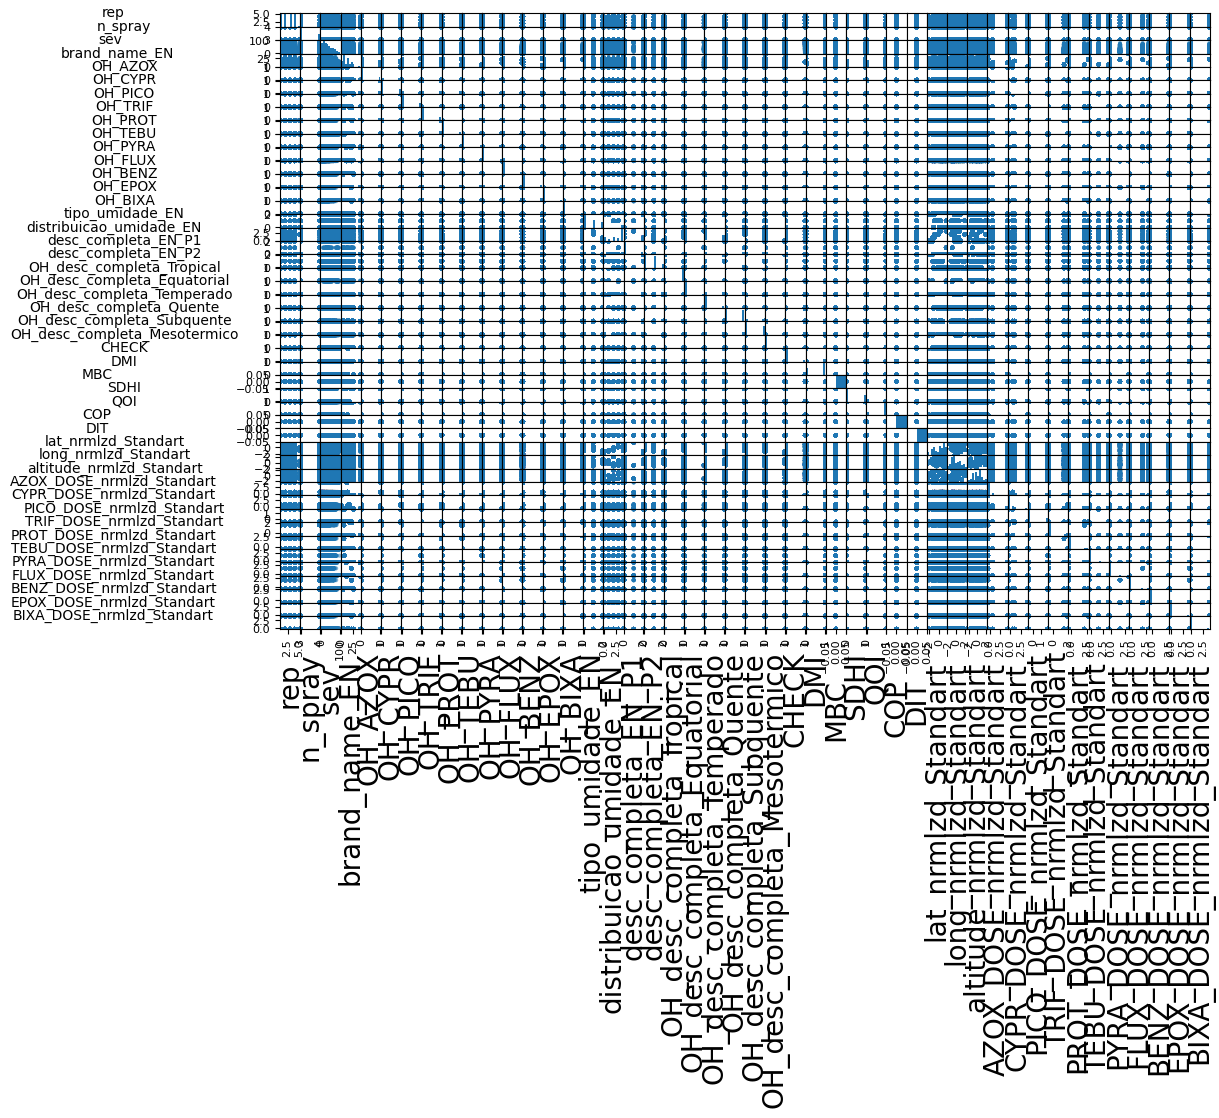

In [ ]:
#Plota a relação de cada campo com os outros
from pandas.plotting import scatter_matrix
fig = scatter_matrix(main_dataTmp, figsize=(12, 8))
for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0, labelpad=100,)

In [77]:
#Separa os dados em grupo de teste e grupo de treino
def split_train_test(data=main_dataTmp, test_ratio=.3):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test()

In [85]:
#Treina e testa o modelo com os dados selecionados
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = main_dataTmp.drop("sev", axis=1)
y = main_dataTmp["sev"]
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(train_set, train_labels)

train_predictions = clf.predict(train_set)
train_accuracy = accuracy_score(train_labels, train_predictions)

# Make predictions on the test set
test_predictions = clf.predict(test_set)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.9884559884559885
Accuracy on test set: 0.8461538461538461


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Load the data into a DataFrame
X = main_dataTmp.drop("sev", axis=1)
y = main_dataTmp["sev"]
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier
clf = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42)

# Train the classifier
clf.fit(train_set, train_labels)

train_predictions = clf.predict(train_set)
train_accuracy = accuracy_score(train_labels, train_predictions)

# Make predictions on the test set
test_predictions = clf.predict(test_set)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)


In [ ]:
#Treina e testa o modelo com os dados selecionados
import sklearn
from sklearn.tree import ExtraTreeRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm

from sklearn.metrics import mean_squared_error

#lin_reg = linear_model.LinearRegression()
#lin_reg = DecisionTreeRegressor()
lin_reg = RandomForestRegressor()
#lin_reg = KernelRidge(alpha=1.0)
#lin_reg = linear_model.Ridge(alpha=.5)
#lin_reg = linear_model.BayesianRidge()
#lin_reg = ExtraTreeRegressor()

lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])


sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2)












#Alvo = Erro no set de treino: 8.073502818210029 , Erro no set de teste:  11.553335741703416

#COM ALTITUDE
#Extra tree: Erro no set de treino: 8.073521001098314 , Erro no set de teste:  11.61327043637036
#Basyesian Ridge: Erro no set de treino: 19.64516360328362 , Erro no set de teste:  18.96937107153677
#Ridge: Erro no set de treino: 19.646652962833457 , Erro no set de teste:  18.971945889252694
#Kernel ridge: Erro no set de treino: 19.65770707551919 , Erro no set de teste:  18.974898520473822
#Random Forest: Erro no set de treino: 8.225527478556199 , Erro no set de teste:  10.58194985313263
#DecisionTree: Erro no set de treino: 8.07350281821003 , Erro no set de teste:  11.548987719625721
#Linear: Erro no set de treino: 19.64383976835559 , Erro no set de teste:  18.9655915690511


#SEM ALTITUDE
#Extra tree: Erro no set de treino: 8.181730321963844 , Erro no set de teste:  12.629762697676199
#Basyesian Ridge: Erro no set de treino: 20.085694948746585 , Erro no set de teste:  19.417896051763556
#Ridge: Erro no set de treino: 19.646652962833457 , Erro no set de teste:  18.971945889252694
#Kernel ridge: Erro no set de treino: 20.084757954607994 , Erro no set de teste:  19.422465530549015
#Random Forest: Erro no set de treino: 8.32118188964604 , Erro no set de teste:  11.507957431180674
#DecisionTree: Erro no set de treino: 8.181523385284308 , Erro no set de teste:  12.352884150653262
#Linear: Erro no set de treino: 20.084715018624443 , Erro no set de teste:  19.423896583733715


#Apenas 2016
  #['rep', 'n_spray', 'sev', 'long', 'lat', 'altitude', 'CHECK', 'DMI','MBC', 'SDHI', 'QOI', 'COP', 'DIT'] = Erro no set de treino: 9.639838573568612 , Erro no set de teste:  13.858244950328045
  #['rep', 'n_spray', 'sev', 'long', 'lat', 'altitude', 'RH_mean2016/12/01', 'CHECK', 'DMI', 'MBC', 'SDHI', 'QOI', 'COP', 'DIT'] = Erro no set de treino: 9.647131863514351 , Erro no set de teste:  13.702829734302746
  #['rep', 'n_spray', 'sev', 'long', 'lat', 'altitude', 'RH_mean2016/12/01',
    #'pr_mean2016/12/01', 'Rs_mean2016/12/01', 'Tmin_mean2016/12/01',
    #'Tmax_mean2016/12/01', 'ETo_mean2016/12/01', 'CHECK', 'DMI', 'MBC',
    #'SDHI', 'QOI', 'COP', 'DIT'] = Erro no set de treino: 9.637437666984072 , Erro no set de teste:  13.839385547015345

  #Apenas altitude e normalizada:
  #['rep', 'n_spray', 'sev', 'long', 'lat', 'altitude_nrmlzd', 'CHECK',
       #'DMI', 'MBC', 'SDHI', 'QOI', 'COP', 'DIT'] = Erro no set de treino: 9.639838573568612 , Erro no set de teste:  13.858244950328045
  #Altitude normalizada:
  #['rep', 'n_spray', 'sev', 'long', 'lat', 'RH_mean2016/12/01',
       #'altitude_nrmlzd', 'pr_mean2016/12/01', 'Rs_mean2016/12/01',
       #'Tmin_mean2016/12/01', 'Tmax_mean2016/12/01', 'ETo_mean2016/12/01',
       #'CHECK', 'DMI', 'MBC', 'SDHI', 'QOI', 'COP', 'DIT'] = Erro no set de treino: 9.637607575553524 , Erro no set de teste:  13.848674224756705
  #Todos normalizados:
  #['rep', 'n_spray', 'sev', 'long', 'lat', 'RH_mean2016/12/01_nrmlzd',
       #'pr_mean2016/12/01_nrmlzd', 'Rs_mean2016/12/01_nrmlzd',
       #'Tmin_mean2016/12/01_nrmlzd', 'Tmax_mean2016/12/01_nrmlzd', 'CHECK',
       #'ETo_mean2016/12/01_nrmlzd', 'DMI', 'MBC', 'SDHI', 'QOI', 'COP', 'DIT'] = Erro no set de treino: 9.639838573568612 , Erro no set de teste:  13.858244950328045



  #['rep', 'n_spray', 'sev', 'yld', 'brand_name_EN', 'altitude_nrmlzd',
       #'RH_mean2016/12/01_nrmlzd', 'pr_mean2016/12/01_nrmlzd',
       #'Rs_mean2016/12/01_nrmlzd', 'Tmin_mean2016/12/01_nrmlzd',
       #'Tmax_mean2016/12/01_nrmlzd', 'ETo_mean2016/12/01_nrmlzd', 'AZOX_DOSE',
       #'CYPR_DOSE', 'PICO_DOSE', 'TRIF_DOSE', 'PROT_DOSE', 'TEBU_DOSE',
       #'PYRA_DOSE', 'FLUX_DOSE', 'BENZ_DOSE', 'EPOX_DOSE', 'BIXA_DOSE',
       #'OH_AZOX', 'OH_CYPR', 'OH_PICO', 'OH_TRIF', 'OH_PROT', 'OH_TEBU',
       #'OH_PYRA', 'OH_FLUX', 'OH_BENZ', 'OH_EPOX', 'OH_BIXA', 'long', 'lat',
       #'tipo_umidade_EN', 'distribuicao_umidade_EN', 'desc_completa_EN_P1',
       #'desc_completa_EN_P2', 'OH_desc_completa_Tropical',
       #'OH_desc_completa_Equatorial', 'OH_desc_completa_Temperado',
       #'OH_desc_completa_Quente', 'OH_desc_completa_Subquente',
       #'OH_desc_completa_Mesotermico', 'CHECK', 'DMI', 'MBC', 'SDHI', 'QOI',
       #'COP', 'DIT'] = Erro no set de treino: 2.7834023405689576 , Erro no set de teste:  8.291947027126685

Erro no set de treino: 3.3649186300605467 , Erro no set de teste:  5.045219051242837


In [ ]:
#Teste dos dados com catboost e xgboost

#import sklearn
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error


lin_reg = CatBoostRegressor(verbose=False)
#lin_reg = XGBRegressor()


lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])


sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2)

Erro no set de treino: 3.451415439722121 , Erro no set de teste:  4.815253383317231


In [ ]:
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg = MLPRegressor(hidden_layer_sizes=(80,40), activation='relu', solver='adam', max_iter=4000)

# utilizando cross validation com 5 folds


lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2)


Erro no set de treino: 3.750740679262777 , Erro no set de teste:  5.110244732700248


In [80]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Create an MLPClassifier for classification
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=4000)

# Train the classifier
mlp.fit(train_set.drop("sev", axis=1), train_set["sev"])

# Make predictions on the training set
sev_predictions_train = mlp.predict(train_set.drop("sev", axis=1))
train_accuracy = accuracy_score(train_set["sev"], sev_predictions_train)

# Make predictions on the test set
sev_predictions_test = mlp.predict(test_set.drop("sev", axis=1))
test_accuracy = accuracy_score(test_set["sev"], sev_predictions_test)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)


Accuracy on training set: 0.8650939918908956
Accuracy on test set: 0.7581755593803786


In [ ]:
pip install catboost

In [ ]:
#Faz a análise dos dados separando por cidades

import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor


desvios = []
years = main_data['Cluster'].unique()
lin_reg = CatBoostRegressor(verbose=False)
output_file = open("./resultados_erros_por_cluster_catboost_com_cidades_kmeans3.txt", "w")
output_file.write(f"Colunas usadas{main_dataTmp.columns}\n")

def split_train_test(data, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

print("Com as colunas:", main_dataTmp.columns)
for y in years:
  df = main_dataTmp.copy()
  df = df[main_data['Cluster'] == y]
  df.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)

  train_set, test_set = split_train_test(df)
  lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

  sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
  lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
  lin_rmse1 = np.sqrt(lin_mse1)
  sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
  lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
  lin_rmse2 = np.sqrt(lin_mse2)

  print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2, ", para cidade = ", y)
  output_file.write(f"{y}:\n")
  output_file.write(f"  Erro no set de treino: {lin_rmse1}, Erro no set de teste: {lin_rmse2}\n")
  output_file.write(f"  Número de linhas: {df.shape[0]}\n")
  output_file.write(f"  Média das severidades: {np.mean(df['sev'].values)}\n")
  output_file.write(f"  Varância das severidades: {np.var(df['sev'].values)}\n")
  output_file.write(f"  Desvio padrão das severidades: {np.std(df['sev'].values)}\n\n")
  desvios.append(np.std(df['sev'].values))
  #plt.clf()
  #plt.title(f'Observando frequência da severidade para a cidades {y}')
  #plt.xlabel('sev')
  #plt.xticks(range(0, 101, 5))
  #plt.ylabel('frequency')
  

  #df['sev'].plot(kind = 'hist', bins=100)
  #plt.savefig(f'./drive/MyDrive/temp/dataset modificado/por cidade/grafico_dados_modificados_cidade_{y}.png')
  
  
  #plt.hist(df['sev'], bins=100, alpha=0.7, label=str(y))

#plt.title('Observando frequência da severidade para as cidades ' + str(years))
#plt.xlabel('sev')
#plt.xticks(range(0, 101, 5))
#plt.ylabel('frequency')
#plt.legend(loc='upper right')
#plt.show()
output_file.write(f"Média dos desvios = {np.mean(desvios)} e desvio padrão dos desvios = {np.std(desvios)}")
output_file.close()

In [ ]:
#Faz a análise dos dados separando por cidades

import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

desvios = []
years = main_data['Cluster'].unique()
clf = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=False)

def split_train_test(data, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

print("Com as colunas:", main_dataTmp.columns)
for y in years:
  print("Cluster: " + str(y))
  df = main_dataTmp.copy()
  df = df[main_data['Cluster'] == y]
  X = df.drop("sev", axis=1)
  y = df["sev"]
  train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier
  

# Train the classifier
  clf.fit(train_set, train_labels)

  train_predictions = clf.predict(train_set)
  train_accuracy = accuracy_score(train_labels, train_predictions)

# Make predictions on the test set
  test_predictions = clf.predict(test_set)
  test_accuracy = accuracy_score(test_labels, test_predictions)

  print("Accuracy on training set:", train_accuracy)
  print("Accuracy on test set:", test_accuracy)
  
  
  #plt.clf()
  #plt.title(f'Observando frequência da severidade para a cidades {y}')
  #plt.xlabel('sev')
  #plt.xticks(range(0, 101, 5))
  #plt.ylabel('frequency')
  

  #df['sev'].plot(kind = 'hist', bins=100)
  #plt.savefig(f'./drive/MyDrive/temp/dataset modificado/por cidade/grafico_dados_modificados_cidade_{y}.png')
  
  
  #plt.hist(df['sev'], bins=100, alpha=0.7, label=str(y))

#plt.title('Observando frequência da severidade para as cidades ' + str(years))
#plt.xlabel('sev')
#plt.xticks(range(0, 101, 5))
#plt.ylabel('frequency')
#plt.legend(loc='upper right')
#plt.show()


In [ ]:
#Faz a análise dos dados separando por cidades

import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

desvios = []
years = main_data['Cluster'].unique()
lin_reg = lin_reg = MLPRegressor(hidden_layer_sizes=(80,40), activation='relu', solver='adam', max_iter=4000)
output_file = open("./resultados_erros_por_cluster_catboost_com_cidades_kmeans3.txt", "w")
output_file.write(f"Colunas usadas{main_dataTmp.columns}\n")

def split_train_test(data, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

print("Com as colunas:", main_dataTmp.columns)
for y in years:
  df = main_dataTmp.copy()
  df = df[main_data['Cluster'] == y]
  df.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)

  train_set, test_set = split_train_test(df)
  lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

  sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
  lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
  lin_rmse1 = np.sqrt(lin_mse1)
  sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
  lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
  lin_rmse2 = np.sqrt(lin_mse2)

  print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2, ", para cidade = ", y)
  output_file.write(f"{y}:\n")
  output_file.write(f"  Erro no set de treino: {lin_rmse1}, Erro no set de teste: {lin_rmse2}\n")
  output_file.write(f"  Número de linhas: {df.shape[0]}\n")
  output_file.write(f"  Média das severidades: {np.mean(df['sev'].values)}\n")
  output_file.write(f"  Varância das severidades: {np.var(df['sev'].values)}\n")
  output_file.write(f"  Desvio padrão das severidades: {np.std(df['sev'].values)}\n\n")
  desvios.append(np.std(df['sev'].values))
  #plt.clf()
  #plt.title(f'Observando frequência da severidade para a cidades {y}')
  #plt.xlabel('sev')
  #plt.xticks(range(0, 101, 5))
  #plt.ylabel('frequency')
  

  #df['sev'].plot(kind = 'hist', bins=100)
  #plt.savefig(f'./drive/MyDrive/temp/dataset modificado/por cidade/grafico_dados_modificados_cidade_{y}.png')
  
  
  #plt.hist(df['sev'], bins=100, alpha=0.7, label=str(y))

#plt.title('Observando frequência da severidade para as cidades ' + str(years))
#plt.xlabel('sev')
#plt.xticks(range(0, 101, 5))
#plt.ylabel('frequency')
#plt.legend(loc='upper right')
#plt.show()
output_file.write(f"Média dos desvios = {np.mean(desvios)} e desvio padrão dos desvios = {np.std(desvios)}")
output_file.close()

In [130]:
#Faz a análise dos dados separando por cidades

import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

desvios = []
years = main_data['Cluster'].unique()
mlp = MLPClassifier(hidden_layer_sizes=(80, 40), activation='relu', solver='adam', max_iter=4000)

def split_train_test(data, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

print("Com as colunas:", main_dataTmp.columns)
for y in years:
  print('Para clustes: ' + str(y))
  df = main_dataTmp.copy()
  df = df[main_data['Cluster'] == y]
  
  train_set, test_set = split_train_test(df)
  mlp.fit(train_set.drop("sev", axis=1), train_set["sev"])

# Make predictions on the training set
  sev_predictions_train = mlp.predict(train_set.drop("sev", axis=1))
  train_accuracy = accuracy_score(train_set["sev"], sev_predictions_train)

# Make predictions on the test set
  sev_predictions_test = mlp.predict(test_set.drop("sev", axis=1))
  test_accuracy = accuracy_score(test_set["sev"], sev_predictions_test)

  print("Accuracy on training set:", train_accuracy)
  print("Accuracy on test set:", test_accuracy)

  

Com as colunas: Index(['rep', 'n_spray', 'sev', 'brand_name_EN', 'RH_mean_mes_11',
       'RH_sd_mes_11', 'RH_max_mes_11', 'RH_min_mes_11', 'RH_mean_mes_12',
       'RH_sd_mes_12',
       ...
       'PICO_DOSE_nrmlzd_Standart', 'TRIF_DOSE_nrmlzd_Standart',
       'PROT_DOSE_nrmlzd_Standart', 'TEBU_DOSE_nrmlzd_Standart',
       'PYRA_DOSE_nrmlzd_Standart', 'FLUX_DOSE_nrmlzd_Standart',
       'BENZ_DOSE_nrmlzd_Standart', 'EPOX_DOSE_nrmlzd_Standart',
       'BIXA_DOSE_nrmlzd_Standart', 'Cluster'],
      dtype='object', length=114)
Para clustes: 1


<ipython-input-130-1f04826e8378>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[main_data['Cluster'] == y]


Accuracy on training set: 0.9684684684684685
Accuracy on test set: 0.8363636363636363
Para clustes: 0


<ipython-input-130-1f04826e8378>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[main_data['Cluster'] == y]


Accuracy on training set: 0.9867695700110254
Accuracy on test set: 0.8716814159292036
Para clustes: 2


<ipython-input-130-1f04826e8378>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[main_data['Cluster'] == y]


Accuracy on training set: 0.9712328767123287
Accuracy on test set: 0.8956043956043956


In [ ]:
len(main_dataTmp.columns)

113

In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


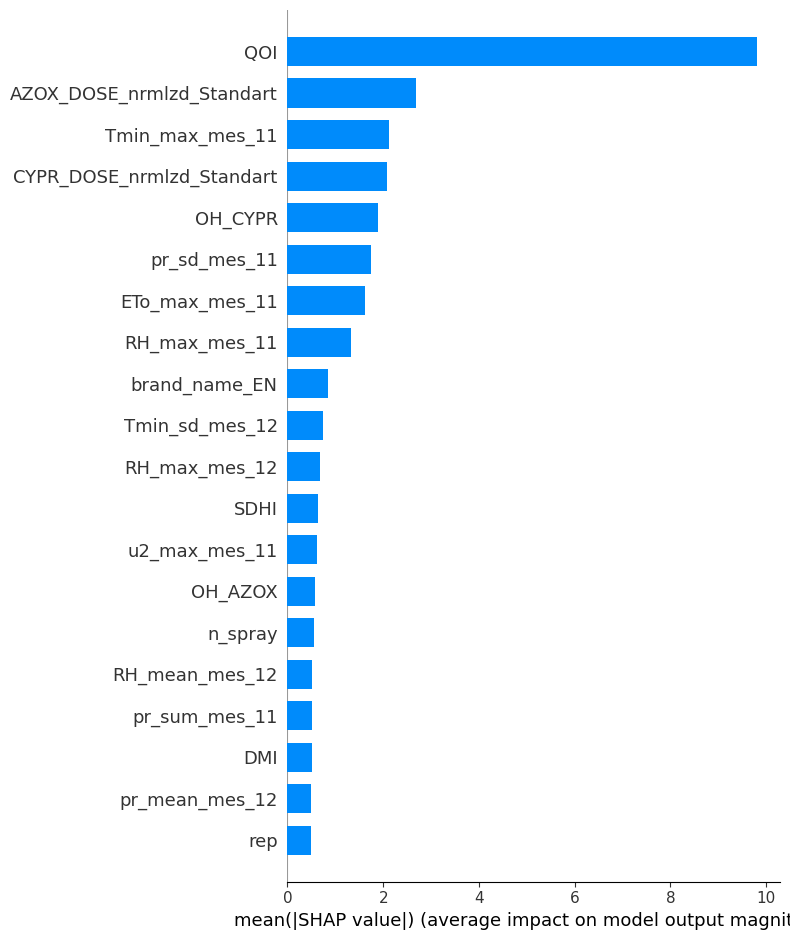

Erro no set de treino: 6.735008945477941 , Erro no set de teste:  11.987348133611949


In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

# carregar os dados
data = main_dataTmp
X = data.drop("sev", axis=1).copy()
# separar em dados de treino e teste
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# criar o modelo
lin_reg = RandomForestRegressor()

# treinar o modelo
lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

# fazer previsões nos dados de treino e calcular o erro quadrático médio
sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)

# fazer previsões nos dados de teste e calcular o erro quadrático médio
sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

# extrair a pontuação de importância das características
importances = lin_reg.feature_importances_

# criar uma série com as pontuações de importância e os nomes das características correspondentes
feature_importances = pd.Series(importances, index=X.columns)

# classificar a série em ordem decrescente de importância
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# criar um gráfico de barras com as pontuações de importância
#plt.figure(figsize=(20,12))
#plt.bar(feature_importances_sorted.index, feature_importances_sorted.values)
#plt.xticks(rotation=90)
#plt.xlabel('Features')
#plt.ylabel('Importance Score')
#plt.title('Feature Importances')
#plt.show()

explainer = shap.TreeExplainer(lin_reg)

# Calculando os SHAP values para os dados de teste
shap_values = explainer.shap_values(test_set.drop("sev", axis=1), check_additivity=False)

# Plotando a importância das features com base nos SHAP values
shap.summary_plot(shap_values, test_set.drop("sev", axis=1), plot_type='bar')


# exibir as pontuações de importância classificadas
#print(feature_importances_sorted)

# exibir os resultados
print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2)








In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_reg = KNeighborsRegressor(n_neighbors=4) # Inicializa o k-NN com 5 vizinhos
knn_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

sev_predictions1 = knn_reg.predict(train_set.drop("sev", axis=1))
lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
sev_predictions2 = knn_reg.predict(test_set.drop("sev", axis=1))
lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2)


Erro no set de treino: 7.988188232615566 , Erro no set de teste:  12.732137712438476


In [ ]:
#SVM

# importar SVM
from sklearn import svm

# criar o modelo SVM
svm_reg = svm.SVR()

# treinar o modelo
svm_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

# fazer previsões nos dados de treino e calcular o erro quadrático médio
sev_predictions1 = svm_reg.predict(train_set.drop("sev", axis=1))
svm_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
svm_rmse1 = np.sqrt(svm_mse1)

# fazer previsões nos dados de teste e calcular o erro quadrático médio
sev_predictions2 = svm_reg.predict(test_set.drop("sev", axis=1))
svm_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
svm_rmse2 = np.sqrt(svm_mse2)

# exibir os resultados
print("Erro no set de treino:", svm_rmse1, ", Erro no set de teste: ", svm_rmse2)


Erro no set de treino: 23.548077864708524 , Erro no set de teste:  24.973736650292963


In [ ]:
#REDE NEURAL

import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# carregar o conjunto de dados como um DataFrame do Pandas
data = main_dataTmp

# extrair as características (X) e a característica alvo (y)
X = data.drop(['sev'], axis=1)
y = data['sev']

# dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizar os dados de entrada
scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test

# criar um objeto MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='relu', solver='adam', max_iter=3000)

# treinar o modelo com os dados de treinamento normalizados
model.fit(X_train_scaled, y_train)

# avaliar o desempenho do modelo nos dados de teste normalizados
score = model.score(X_test_scaled, y_test)

# exibir o desempenho do modelo
print("R2 score: {:.2f}".format(score))


R2 score: -97.83


R2 score: 0.83


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/775 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


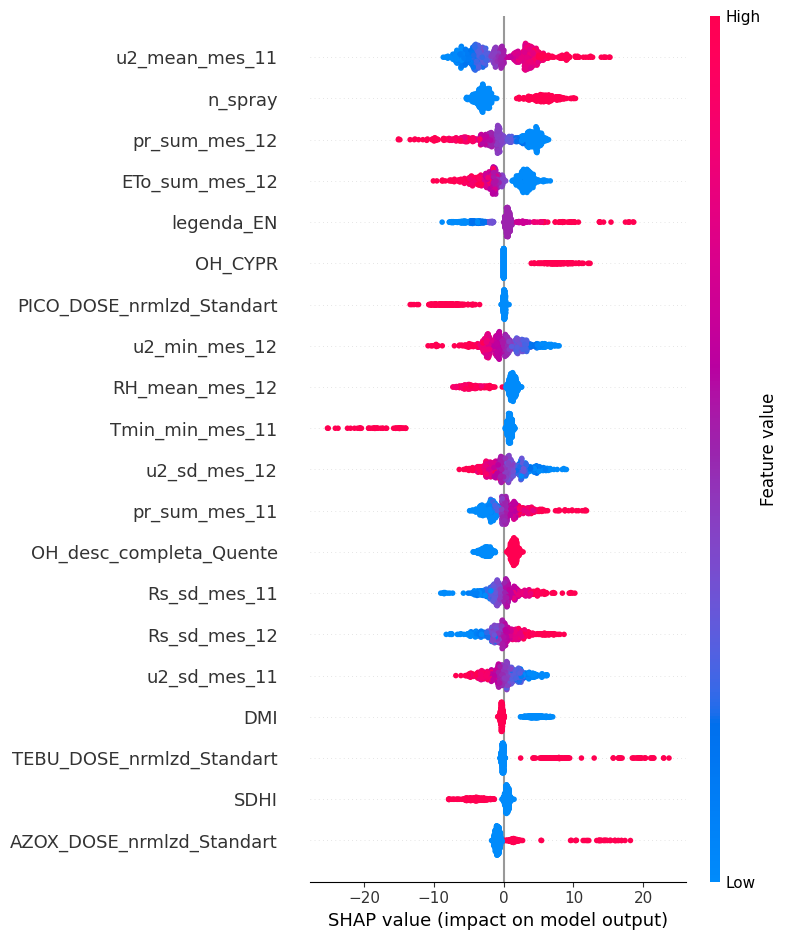

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap

# carregar o conjunto de dados como um DataFrame do Pandas
data = main_dataTmp

# extrair as características (X) e a característica alvo (y)
X = data.drop(['sev'], axis=1)
y = data['sev']

# definir os nomes das características
feature_names = X.columns

# dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizar os dados de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# criar um objeto MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(80,80,80), activation='relu', solver='adam', max_iter=3000)

# treinar o modelo com os dados de treinamento normalizados
model.fit(X_train_scaled, y_train)

# avaliar o desempenho do modelo nos dados de teste normalizados
score = model.score(X_test_scaled, y_test)

# exibir o desempenho do modelo
print("R2 score: {:.2f}".format(score))

# criar um objeto KernelExplainer do SHAP
explainer = shap.KernelExplainer(model.predict, shap.kmeans(X_train_scaled, 60))

# definir os nomes das características no objeto KernelExplainer
explainer.feature_names = feature_names

# calcular os SHAP values para os dados de teste
shap_values = explainer.shap_values(X_test_scaled)

# plotar o gráfico de forças para os dados de teste
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)


In [ ]:
pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.4 MB/s eta 0:00:00


In [ ]:
from genetic_selection import GeneticSelectionCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# load the iris dataset
dataIn = main_dataTmp

# extract the features and target variable
target = dataIn['sev']
data = dataIn.drop(['sev'], axis=1)

# create a logistic regression classifier
rf = RandomForestRegressor(random_state=0)

# create a genetic feature selection object
selector = GeneticSelectionCV(rf,
                              cv=3,
                              verbose=1,
                              max_features=112,
                              scoring='neg_mean_squared_error',
                              n_population=15,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=30,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=5,
                              n_gen_no_change=20,
                              caching=True,
                              n_jobs=-1)

# perform genetic feature selection on the training set
selector = selector.fit(data, target)

# get the selected feature indices
feature_idx = selector.support_

# get the feature names
feature_names = data.columns

#valores = []

#for i in feature_idx:
#  valores.append(i)


# print the selected feature names
print(feature_idx)
print(feature_names[feature_idx])
#print(feature_names[valores == True])
#print(feature_idx.astype(int))



Selecting features with genetic algorithm.
gen	nevals	avg                                  	std                                  	min                                  	max                                  
0  	15    	[-438.909735   42.8       110.92839 ]	[ 107.61991    25.485159   46.093352]	[-593.37411     8.         32.930477]	[-234.322742   98.        200.035442]
1  	10    	[-330.375088   46.666667  100.377791]	[ 52.536981  19.730405  36.395042]   	[-460.120629   13.         28.528707]	[-224.465278   86.        177.325505]
2  	12    	[-248.709412   50.933333   59.185953]	[ 45.449118  10.363183  41.780072]   	[-324.945366   42.         19.169458]	[-191.333834   79.        146.882415]
3  	10    	[-199.972468   46.         38.016398]	[ 10.784029   2.780887  13.232355]   	[-224.465278   42.         19.169458]	[-191.333834   53.         58.314234]
4  	6     	[-191.436023   46.933333   47.469133]	[ 0.382354  0.249444  1.054742]      	[-192.86666    46.         43.522649]	[-191.333834   47

In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cac